In [1]:
import numpy as np
from os import listdir
import os.path as osp
import pandas as pd

path = "data/register.xls"
labels = pd.read_excel(path)
labels

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
0,CG009,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,C
1,CG011,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
2,CG013,男,国外,外国語がうまくなる方法について,中国語,2年未満,上級,A,A
3,CG015,男,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
4,CG017,女,国外,外国語がうまくなる方法について,中国語,2年未満,中級,B,A
...,...,...,...,...,...,...,...,...,...
299,KN303,女,国内,外国語がうまくなる方法について,韓国語,2年未満,中級,X,X
300,KN307,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
301,KN312,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
302,KN313,男,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X


In [2]:
from collections import Counter
a = Counter(labels.日本語レベル)
a

Counter({'初級': 31, '上級': 124, '中級': 149})

In [3]:
import numpy as np
label1 = labels.loc[labels.作文テーマ == "外国語がうまくなる方法について",:]
label1

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
0,CG009,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,C
1,CG011,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
2,CG013,男,国外,外国語がうまくなる方法について,中国語,2年未満,上級,A,A
3,CG015,男,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
4,CG017,女,国外,外国語がうまくなる方法について,中国語,2年未満,中級,B,A
...,...,...,...,...,...,...,...,...,...
299,KN303,女,国内,外国語がうまくなる方法について,韓国語,2年未満,中級,X,X
300,KN307,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
301,KN312,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
302,KN313,男,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X


In [4]:
b = Counter(label1.日本語レベル)
b

Counter({'初級': 31, '上級': 61, '中級': 100})

In [5]:
label2 = labels.loc[labels.作文テーマ == "インターネット時代に新聞や雑誌は必要か",:]
label2

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
76,CG101,男,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
77,CG102,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
78,CG103,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
79,CG104,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
80,CG105,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,上級,X,X
...,...,...,...,...,...,...,...,...,...
292,KG151,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,5年以上,上級,X,X
293,KG152,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年以上5年未満,上級,X,X
294,KG153,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年以上5年未満,上級,X,X
295,KG154,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年未満,中級,X,X


In [6]:
c = Counter(label2.日本語レベル)
c

Counter({'中級': 49, '上級': 63})

In [7]:
level1 = np.array(label1.日本語レベル)
level1, len(level1)

(array(['初級', '初級', '上級', '初級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '初級', '中級', '上級', '初級', '初級', '中級', '中級',
        '初級', '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '初級', '中級',
        '中級', '上級', '中級', '中級', '初級', '初級', '中級', '上級', '中級', '上級', '中級',
        '上級', '中級', '初級', '中級', '中級', '初級', '上級', '初級', '中級', '中級', '上級',
        '初級', '初級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '上級',
        '中級', '中級', '中級', '初級', '中級', '初級', '中級', '中級', '上級', '上級', '初級',
        '上級', '中級', '中級', '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '上級', '上級', '上級',
        '中級', '中級', '中級', '中級', '初級', '中級', '中級', '初級', '中級', '中級', '中級',
        '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '中級', '中級',
        '上級', '中級', '上級', '上級', '中級', '上級', '上級', '中級', '中級', '初級', '中級',
        '中級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '中級', '上級', '上級',
        '上級', '中級', '初級', '中級', '中級', 

In [8]:
level2 = np.array(label2.日本語レベル)
level2, len(level2)

(array(['中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '中級', '上級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級',
        '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '上級',
        '中級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '中級', '上級'], dtype=object),
 112)

In [9]:
from os import listdir
txt_path = "data/txt/"
txt_topics = listdir(txt_path)

txt_gaigo_path = txt_path + txt_topics[0]
txt_internet_path = txt_path + txt_topics[1]

txt_gaigo_files = listdir(txt_gaigo_path)
txt_internet_files = listdir(txt_internet_path)

In [10]:
# import os.path as osp
# import re
# gaigo_files = [f for f in listdir(osp.join(txt_path, txt_topics[0])) if f.endswith('.txt')]
# gaigo = []
# for gaigo_file in gaigo_files:
#     # print(gaigo_file)
#     with open(osp.join(txt_path, txt_topics[0], gaigo_file), "r", encoding="utf-8") as f:
#         lines = f.read()
#         # type(lines)
#         lines = re.sub('\n', '', lines)
#         lines = re.sub('\u3000', '', lines)
#     gaigo.append(lines)
# # type(gaigo[0])
# # gaigo[0][0]

import os.path as osp
import re
gaigo_files = [f for f in listdir(osp.join(txt_path, txt_topics[0])) if f.endswith('.txt')]
gaigo = []
for gaigo_file in gaigo_files:
    # print(gaigo_file)
    with open(osp.join(txt_path, txt_topics[0], gaigo_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # type(lines)
        lines = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", lines)
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}・［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)
        lines = lines.replace(" ", "")


    gaigo.append(lines)
# type(gaigo[0])
len(gaigo)

# 注意。注釈は削除していない。記号のみ

192

In [11]:
# import re
# internet_files = [f for f in listdir(osp.join(txt_path, txt_topics[1])) if f.endswith('.txt')]
# internet = []
# for internet_file in internet_files:
#     with open(osp.join(txt_path, txt_topics[1], internet_file), "r", encoding="utf-8") as f:
#         lines = f.read()
#         # print(lines)
#         lines = lines.strip('\ufeff□')
#         lines = re.sub('■', '', lines)
#         lines = re.sub('\n', '', lines)
#         lines = re.sub('□', '', lines)
#         lines = re.sub('\u3000', '', lines)
        
#     internet.append(lines)

# internet[0]

import re
internet_files = [f for f in listdir(osp.join(txt_path, txt_topics[1])) if f.endswith('.txt')]
internet = []
for internet_file in internet_files:
    with open(osp.join(txt_path, txt_topics[1], internet_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # print(lines)
        lines = lines.strip('\ufeff□')
        lines = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", lines)
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}・［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)
        lines = lines.replace(" ", "")
        
    internet.append(lines)

len(internet)
# + delete ・・・

112

In [12]:
from collections import defaultdict as dd
text_tagged = dd(list)
for level, txt in zip(level1, gaigo):
    text_tagged[level].append(txt)

for level, txt in zip(level2, internet):
    text_tagged[level].append(txt)

text_tagged_dict = dict(text_tagged)
# text_tagged_dict
for level in text_tagged_dict.keys():
    print(len(text_tagged_dict[level]))

31
124
149


In [13]:
import pickle 
# with open('text_tagged_dict2.pickle', 'wb') as f:
#     pickle.dump(text_tagged_dict, f)
    
text_tagged_dict2 = pickle.load(open('text_tagged_dict2.pickle', 'rb'))
# text_tagged_dict2

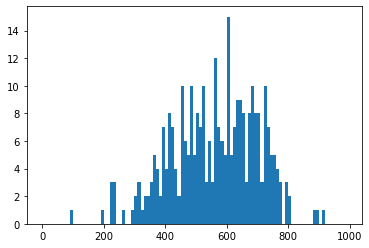

In [14]:
import matplotlib.pyplot as plt
import numpy as np

text_length_dist = [len(text) for level in text_tagged_dict2.keys() for text in text_tagged_dict2[level]]
# [len(text) for text in text_tagged_dict2["初級"]]
# text_length_dist

# np.max(text_length_dist) = 914
# to determine how many paddings we should add 
plt.hist(text_length_dist, bins = np.arange(0, 1000, 10))
plt.show()
# we can determine the max length of texts as 1000 

In [16]:
import spacy
from tqdm import tqdm
nlp = spacy.load('ja_ginza')

a = text_tagged_dict2["初級"][0]
sents = nlp(a)
for token in sents:
    # print(token)
    pass

# word2index = {}
vectors = {}
for level in tqdm(text_tagged_dict2.keys()):
    vectors[level] = []
    for text in text_tagged_dict2[level]:
        wakati = nlp(text)
        for token in wakati:
            # token = str(token)
            # if token in word2index:  continue
            # word2index[token] = len(word2index)
            
            vectors[level].append(token.vector)
            
        
for level in vectors:
    vectors[level] = np.array(vectors[level])
# word2index
# index2word = dict((i, w) for w, i in word2index.items())
# index2word[4882], word2index["愉快"]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:23<00:00,  7.73s/it]


In [17]:
import math
vectors_train = {}
vectors_test = {}
train_rate = 0.8
for level in vectors:
    length = int(len(vectors[level]) * train_rate) 
    # print(length)
    vectors_train[level] = vectors[level][:length,:]
    vectors_test[level] = vectors[level][length:,:]

# vectors_train["初級"].shape, vectors_test["初級"].shape, vectors["初級"].shape

In [18]:
import pandas as pd

keys, values = zip(*vectors.items())

data = pd.DataFrame({'cat': keys, 'vectors': values})
data.head()

for vector in data.vectors:
    print(vector.shape)

(7655, 300)
(41447, 300)
(48522, 300)


In [23]:
# text_tagged_dict2

In [19]:
from tqdm import tqdm

text_tagged_dict3 = {}
for level in tqdm(text_tagged_dict2.keys()):
    text_tagged_dict3[level] = []
    for text in text_tagged_dict2[level]:
        wakati = nlp(text)
        words = []
        for token in wakati:
            token = str(token)
            # if token in word2index:  continue
            # word2index[token] = len(word2index)
            # text_tagged_dict3[level][i].append(token)
            words.append(token)
        text_tagged_dict3[level].append(words)
            
            
            

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:23<00:00,  7.73s/it]


In [20]:
# text_tagged_dict3["初級"]

In [20]:
import pickle 
# with open('text_tagged_dict3.pickle', 'wb') as f:
#     pickle.dump(text_tagged_dict3, f)
    
text_tagged_dict3 = pickle.load(open('text_tagged_dict3.pickle', 'rb'))
# text_tagged_dict3

In [21]:
total = 0
for text in text_tagged_dict3:
    text_len = len(text_tagged_dict3[text])
    total += text_len
    print(text_len)
print("total texts: {}".format(total))

31
124
149
total texts: 304


In [22]:
total = 0
for text in text_tagged_dict2.values():
    text_len = len(text)
    total += text_len
    print(text_len)
print("total texts: {}".format(total))

31
124
149
total texts: 304


In [23]:
total_tokens = []
for level, texts in text_tagged_dict3.items():
    # print(level)
    for text in texts:
        total_tokens.append(len(text))
        # print(len(text))
max(total_tokens), min(total_tokens)

(521, 62)

In [ ]:
texts

[['私',
  'は',
  '大学',
  '日本語',
  '科',
  'の',
  '一',
  '年生',
  'です',
  'いま',
  '外国語',
  'が',
  'たくさん',
  'ひと',
  'が',
  '学習',
  'し',
  'まし',
  'た',
  'で',
  'も',
  '私',
  'は',
  '日本語',
  'より',
  '英語',
  'の',
  'ほう',
  'が',
  '難しい',
  'と',
  '思い',
  'まし',
  'た',
  '外国語',
  'が',
  'うまく',
  'なる',
  'いろいろ',
  '方法',
  'が',
  '習っ',
  'て',
  'い',
  'ます',
  '単語',
  'を',
  '覚え',
  'て',
  'い',
  'ます',
  '会話',
  'を',
  '読み',
  'ます',
  '聴解',
  'を',
  '聞き',
  'ます',
  '以上',
  'は',
  'すべて',
  '外国語',
  'が',
  'うまく',
  'なる',
  '方法',
  'です',
  '日本語',
  '聴解',
  'が',
  '私',
  'に',
  'とっ',
  'て',
  'にくい',
  'と',
  '思い',
  'ます',
  '先生',
  'は',
  '日本語',
  '聴解',
  'よく',
  'を',
  '私',
  'に',
  '言い',
  'ます',
  '私',
  'は',
  '聴解',
  '教材',
  'を',
  '聞き',
  'て',
  'み',
  'まし',
  'た',
  'やはり',
  '聴解',
  '教材',
  'を',
  'よく',
  '聞き',
  'ば',
  '聴解',
  'ほど',
  'よい',
  'て',
  'し',
  'ます',
  'いま',
  '私',
  'は',
  '私',
  'の',
  '日本語',
  '能力',
  'こと',
  'が',
  'できる',
  'ど',
  'て',
  'も',
  'いい',
  'たい',
  'と',
  '思い',
  'ます

In [25]:
from numpy import random
window_size = 15
n_sample =  10 # less than or equal to (len(text_tagged_dict3["初級"][0]) - window_size)
sents = []
start_index_list = []
for i in range(n_sample):
    start_index = 0
    # do while
    while(True):
        start_index = random.randint(len(text_tagged_dict3["初級"][0]) - window_size)
        if not start_index in start_index_list:
            break
    start_index_list.append(start_index)    
    words = []    
    for index in range(start_index, start_index + window_size):
        # +1 to slide
        words.append(text_tagged_dict3["初級"][0][index+1])
    sents.append(words)

# sents, start_index_list
sents

[['を',
  '聞き',
  'まし',
  'た',
  '歌',
  'を',
  '聞き',
  'ながら',
  '歌',
  'の',
  '内容',
  'を',
  '書き',
  'まし',
  'た'],
 ['単語',
  'を',
  '読ん',
  'で',
  'い',
  'まし',
  'た',
  'よる',
  'ドラマ',
  'を',
  '見',
  'て',
  'い',
  'まし',
  'た'],
 ['たくさん',
  '練習',
  'し',
  'まし',
  'た',
  'たくさん',
  'の',
  '日本',
  'の',
  '歌',
  'を',
  '聞き',
  'まし',
  'た',
  '歌'],
 ['は',
  '先生',
  'が',
  '教え',
  'た',
  'とおり',
  'に',
  'し',
  'て',
  'い',
  'まし',
  'た',
  '毎朝',
  '単語',
  'を'],
 ['先生',
  'が',
  '日本語',
  'が',
  'うまく',
  'なる',
  '方法',
  'を',
  '聞き',
  'まし',
  'た',
  '先生',
  'は',
  '毎日',
  '単語'],
 ['た',
  'とおり',
  'に',
  'し',
  'て',
  'い',
  'まし',
  'た',
  '毎朝',
  '単語',
  'を',
  '読ん',
  'で',
  'い',
  'まし'],
 ['聞き',
  'まし',
  'た',
  '歌',
  'を',
  '聞き',
  'ながら',
  '歌',
  'の',
  '内容',
  'を',
  '書き',
  'まし',
  'た',
  'いま'],
 ['の',
  '内容',
  'を',
  '書き',
  'まし',
  'た',
  'いま',
  '私',
  'は',
  '日本語',
  'が',
  'やさしい',
  'と',
  '思い',
  'ます'],
 ['と',
  '言い',
  'まし',
  'た',
  '私',
  'は',
  '先生',
  'が',
  '教え',
  'た',
  'とおり

In [41]:
# text_tagged_dict3["初級"][0][-window_size:]
# sample_size

In [39]:
# text_tagged_dict3["初級"]

In [26]:
from numpy import random
from tqdm import tqdm
window_size = 15
n_sample =  2 # less than or equal to (len(text_tagged_dict3["初級"][0]) - window_size)
text_transformed = {}
#for level, texts in tqdm(text_tagged_dict3.items()):
for level, level_texts in tqdm(text_tagged_dict3.items()):
    #print(texts)
    text_transformed[level] = []
    for text in level_texts:
        sents = []
        start_index_list = []
        for i in range(n_sample):
            start_index = 0
            # do while
            while(True):
                start_index = random.randint(len(text) - window_size)
                if not start_index in start_index_list:
                    break
    #            print(start_index, start_index in start_index_list, start_index_list)
            start_index_list.append(start_index)
            words = []
            for index in range(start_index, start_index + window_size):
                # +1 to slide
                words.append(text[index+1])
            sents.append(words)
        text_transformed[level].append(sents)
    text_transformed[level] = np.array(text_transformed[level]).reshape(-1, window_size)
    
    # print(texts)
    # break
# print(text_transformed)
# text_transformed["初級"]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 499.94it/s]


In [27]:
text_transformed["初級"].shape

(62, 15)

In [28]:
len(tqdm(text_tagged_dict3[level]))

  0%|                                                                                          | 0/149 [00:00<?, ?it/s]


149

In [81]:
import pickle 
# with open('text_transformed_window_size15.pickle', 'wb') as f:
#     pickle.dump(text_transformed, f)
    
text_tagged_dict3 = pickle.load(open('text_transformed_window_size15.pickle', 'rb'))
# text_tagged_dict3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               1376256   
                                                                 
 dense (Dense)               (None, 1087)              279359    
                                                                 
Total params: 1,655,615
Trainable params: 1,655,615
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
text_transformed["初級"][4]

array(['が', '方法', 'です', 'たとえば', '外国語', 'の', '本', 'を', '読', 'と', 'か',
       '外国語', 'の', '方法', 'を'], dtype='<U6')

In [195]:
sample_txta = text_transformed["初級"][4]
txta = nlp("".join(sample_txta))
txta_vector = np.array([tok.vector for tok in txta])
# txta_vector.shape
txtb_vector = list()
for word in sample_txta:
    a = nlp(word)
    txtb_vector.append(a.vector)
# np.array(txtb_vector).shape

In [201]:
list(txta_vector)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [199]:
txtb_vector

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [30]:
import spacy
# nlp = spacy.load('ja_ginza_electra')
nlp = spacy.load('ja_ginza')

from tqdm import tqdm

category_vectors2 = []

for cat, text in text_transformed.items():
    for sents in tqdm(text):
        sents = [nlp(word) for word in sents]
        word_vector = np.array([tok.vector for tok in sents])
        # sent_vecs = []
        # for sent in sents:
        #     sent = nlp(sent)
        #     word_vector = np.array([tok.vector for tok in sent])
        #     sent_vecs.append(word_vector)
        category_vectors2.append((cat, np.array(word_vector)))
    

100%|████████████████████████████████████████████████████████████████████████████████| 298/298 [00:37<00:00,  8.05it/s]


In [31]:
# b = []
# for i in range(len(category_vectors2)):
#     b.append(category_vectors2[i][1].shape)
    
# c = Counter(b)
# c

Counter({(15, 300): 608})

In [174]:
# text_transformed["上級"][101 - 62]

array(['学校', 'で', '半年', '勉強', 'し', 'て', ' ', 'の', '級', 'を', '取っ', 'た',
       'その', '後', '日本'], dtype='<U9')

In [178]:
# sample_txt = text_transformed["上級"][101 - 62]
# sample_a = nlp("".join(sample_txt))
# sample_a

学校で半年勉強して の級を取ったその後日本

In [179]:
# text_transformed["上級"][270 - 62]

array(['あれ', 'ば', '米国', 'と', 'か', '他', 'の', '外国', 'の', '顔', 'も', '知ら',
       'ない', '人', 'とも'], dtype='<U9')

In [187]:
# sample_txt2 = text_transformed["上級"][270 - 62]
# sample_a2 = nlp("".join(sample_txt2))
# for i in sample_a2:
#     print(i)
#

あれ
ば
米国
と
か
他
の
外国
の
顔
も
知ら
ない
人
と
も


In [ ]:
# as shown here, the result of tokenization might differ between the initial tokenization and the tokenization of the joined phrases
# the initial tokenization = text_transformed["上級"][270 - 62],
# the tokenization of joined phrases = the result right above
# the difference here is caused by difference in interpretation of "とも"
# "とも" is recognized as 1 word in the former whereas it is interpreted as 2 words in the latter

In [170]:
# for i in range(len(category_vectors2)):
#     print(i, category_vectors2[i][1].shape)

0 (15, 300)
1 (15, 300)
2 (15, 300)
3 (15, 300)
4 (15, 300)
5 (15, 300)
6 (15, 300)
7 (15, 300)
8 (15, 300)
9 (15, 300)
10 (15, 300)
11 (15, 300)
12 (15, 300)
13 (15, 300)
14 (15, 300)
15 (15, 300)
16 (15, 300)
17 (15, 300)
18 (15, 300)
19 (15, 300)
20 (15, 300)
21 (15, 300)
22 (15, 300)
23 (15, 300)
24 (15, 300)
25 (15, 300)
26 (15, 300)
27 (15, 300)
28 (15, 300)
29 (15, 300)
30 (15, 300)
31 (15, 300)
32 (15, 300)
33 (15, 300)
34 (15, 300)
35 (15, 300)
36 (15, 300)
37 (15, 300)
38 (15, 300)
39 (15, 300)
40 (15, 300)
41 (15, 300)
42 (15, 300)
43 (15, 300)
44 (15, 300)
45 (15, 300)
46 (15, 300)
47 (15, 300)
48 (15, 300)
49 (15, 300)
50 (15, 300)
51 (15, 300)
52 (15, 300)
53 (15, 300)
54 (15, 300)
55 (15, 300)
56 (15, 300)
57 (15, 300)
58 (15, 300)
59 (15, 300)
60 (15, 300)
61 (15, 300)
62 (15, 300)
63 (15, 300)
64 (15, 300)
65 (15, 300)
66 (15, 300)
67 (15, 300)
68 (15, 300)
69 (15, 300)
70 (15, 300)
71 (15, 300)
72 (15, 300)
73 (15, 300)
74 (15, 300)
75 (15, 300)
76 (15, 300)
77 (15, 3

In [32]:
import pandas as pd

key, value = zip(*category_vectors2)
data2 = pd.DataFrame({'cat': key, 'value': value})

data2.head()


,cat,value
0,初級,"[[-0.10853964, 0.15106305, 0.14121392, 0.18705..."
1,初級,"[[-0.2576068, -0.25494727, -0.18487234, -0.034..."
2,初級,"[[-0.13697676, -0.23937745, 0.045566633, -0.20..."
3,初級,"[[-0.10983511, -0.1689055, -0.12226205, -0.016..."
4,初級,"[[-0.05846101, -0.1564513, -0.05254956, -0.136..."


In [33]:
from collections import Counter

a = Counter(data2.cat)
a

Counter({'初級': 62, '上級': 248, '中級': 298})

In [34]:
test = data2.sample(frac=0.2, random_state=200)
train = data2.drop(test.index)

test.shape, train.shape

((122, 2), (486, 2))

In [56]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data.cat)
y_train = le.transform(train.cat).reshape(-1, 1)
ohe.fit(y_train)
y_train = ohe.transform(y_train).todense()

X_train = np.array([x for x in train.value])

X_train.shape, y_train.shape

((486, 15, 300), (486, 3))

In [61]:
window_size

15

In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

n_rnn = window_size  # 時系列の数
batch_size = 128
epochs = 20  #epochsは、多いほど、精密に学習するが、重くなるため今回は小さくしている
n_mid = 256  # 中間層のニューロン数
data_dim = 300

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, data_dim)))
model_lstm.add(Dense(data_dim, activation="relu"))
model_lstm.add(Dense(3, activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               570368    
                                                                 
 dense_7 (Dense)             (None, 300)               77100     
                                                                 
 dense_8 (Dense)             (None, 3)                 903       
                                                                 
Total params: 648,371
Trainable params: 648,371
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=epochs)

Epoch 1/20
16/16 [==============================] - 2s 33ms/step - loss: 0.9761 - accuracy: 0.4774
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9401 - accuracy: 0.5000
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9107 - accuracy: 0.5267
Epoch 4/20
16/16 [==============================] - 1s 31ms/step - loss: 0.8713 - accuracy: 0.5412
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.8490 - accuracy: 0.5741
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.8057 - accuracy: 0.5761
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.8132 - accuracy: 0.6235
Epoch 8/20
16/16 [==============================] - 1s 32ms/step - loss: 0.7731 - accuracy: 0.6008
Epoch 9/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6623 - accuracy: 0.6852
Epoch 10/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6061 - accuracy: 0.7346
Epoch 11/

In [70]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data.cat)
y_test = le.transform(test.cat).reshape(-1, 1)
ohe.fit(y_test)
y_test = ohe.transform(y_test).todense()

X_test = np.array([x for x in test.value])

X_test.shape, y_test.shape

((122, 15, 300), (122, 3))

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(model_lstm.predict(X_test), axis=1), np.argmax(y_test, axis=1))

4/4 [==============================] - 0s 16ms/step


0.4426229508196721

The accuracy was 44%. This needs fine-tuning. Possible suggestions for fine-tuning are grid

In [75]:
np.argmax(model_lstm.predict(X_test), axis=1)

4/4 [==============================] - 0s 15ms/step


array([0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [79]:
np.argmax(y_test, axis=1).reshape(-1)

matrix([[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
         0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0,
         1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2,
         1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
         1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1,
         1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]], dtype=int64)

## Trial & Error

In [21]:
import pickle 
# with open('index2word.pickle', 'wb') as f:
#     pickle.dump(index2word, f)
    
index2word = pickle.load(open('index2word.pickle', 'rb'))
word2index = dict((i, w) for w, i in index2word.items())
# index2word[4882], word2index["愉快"]
index2word

{0: 'この',
 1: '数十',
 2: '年',
 3: 'の',
 4: '間',
 5: 'に',
 6: 'テレビ',
 7: 'や',
 8: '携帯電話',
 9: 'など',
 10: '便利',
 11: 'な',
 12: 'もの',
 13: 'は',
 14: '世界的',
 15: '使わ',
 16: 'れ',
 17: 'て',
 18: 'い',
 19: '私たち',
 20: '現代人',
 21: '生活',
 22: '大きな',
 23: '役',
 24: '立っ',
 25: 'いる',
 26: 'だ',
 27: 'その',
 28: '何',
 29: '種類',
 30: '産品',
 31: '中',
 32: '一番',
 33: 'さ',
 34: 'が',
 35: '持っ',
 36: 'を',
 37: '影響',
 38: 'する',
 39: 'コンピューター',
 40: 'と',
 41: '思う',
 42: '今',
 43: 'で',
 44: 'も',
 45: 'できる',
 46: 'ん',
 47: 'でしょう',
 48: '例えば',
 49: 'ネット',
 50: '使っ',
 51: 'どの',
 52: '国',
 53: 'どんな',
 54: 'こと',
 55: 'あっ',
 56: 'た',
 57: 'か',
 58: 'すぐ',
 59: '分かる',
 60: '買い物',
 61: 'し',
 62: 'たり',
 63: 'ホテル',
 64: '予約',
 65: 'いろいろ',
 66: 'ただ',
 67: '指',
 68: '完成',
 69: '一方',
 70: '発達',
 71: 'よっ',
 72: 'たくさん',
 73: '問題',
 74: '次',
 75: 'から',
 76: 'へ',
 77: '生じる',
 78: 'ずっと',
 79: '宿題',
 80: 'レポート',
 81: '子',
 82: 'たち',
 83: 'ほとんど',
 84: '字',
 85: 'きたなく',
 86: 'なっ',
 87: '書け',
 88: 'ない',
 89: '漢字',
 90: '昔',
 91: 'より

In [93]:
print("vocab size: {}".format(len(word2index)))

lemma size: 4883


In [ ]:
# import spacy
# # nlp = spacy.load('ja_ginza_electra')
# nlp = spacy.load('ja_ginza')

# from tqdm import tqdm

# category_vectors = []

# for cat, text in text_tagged_dict.items():
#     for sents in tqdm(text):
#         sents = nlp(sents)
#         word_vector = np.array([tok.vector for tok in sents])
#         # sent_vecs = []
#         # for sent in sents:
#         #     sent = nlp(sent)
#         #     word_vector = np.array([tok.vector for tok in sent])
#         #     sent_vecs.append(word_vector)
#         category_vectors.append((cat, np.array(sent_vecs)))

In [3]:
import torch
torch.__version__

'1.12.1'

## Embedding
- num_embeddings (int) – size of the dictionary of embeddings

- embedding_dim (int) – the size of each embedding vector

In [70]:
dict2 = {}
for level in text_tagged_dict2.keys():
    dict2[level] = ("").join(text_tagged_dict2[level])
    
# dict2

In [71]:
import numpy as np

length = [len(dict2[level]) for level in dict2.keys()]
chars = [sorted(list(set(dict2[level]))) for level in dict2.keys()]
char_length = [len(char) for char in chars]

print("text length: {}".format(length))
print("vocab: {}".format(char_length))
# len(chars[0])

text length: [14443, 50572, 64466]
vocab: [625, 966, 1087]


In [23]:
# a = [1, 2, 3]
# a_string = map(str, a)
# print(list(a_string))
# b = ("").join(a_string)
# print(list(a_string))

['1', '2', '3']
[]


In [77]:
import spacy
# nlp = spacy.load('ja_ginza_electra')
nlp = spacy.load('ja_ginza')

from tqdm import tqdm

category_vectors = []

for cat, text in text_tagged_dict.items():
    for sents in tqdm(text):
        sents = nlp(sents)
        word_vector = np.array([tok.vector for tok in sents])
        # sent_vecs = []
        # for sent in sents:
        #     sent = nlp(sent)
        #     word_vector = np.array([tok.vector for tok in sent])
        #     sent_vecs.append(word_vector)
        category_vectors.append((cat, np.array(sent_vecs)))
    
# 一つの長文の形に変形したのでspacyでうまくいくかわからない

100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:08<00:00, 12.37it/s]


In [112]:
category_vectors

('初級',
 array([[[-0.0063053 , -0.04985307, -0.22556107, ...,  0.06186676,
          -0.05566797, -0.00957808]],
 
        [[-0.08274004, -0.09103364, -0.08744463, ..., -0.06126847,
          -0.00597147, -0.00478465]],
 
        [[ 0.17216177,  0.09944343,  0.38480812, ...,  0.17196812,
           0.02225779,  0.12094363]],
 
        ...,
 
        [[-0.09195102, -0.10327693, -0.11661331, ..., -0.12604538,
          -0.07508431,  0.0575574 ]],
 
        [[ 0.30234763,  0.10496894,  0.24105701, ..., -0.06826453,
          -0.29353613,  0.07642345]],
 
        [[-0.10983511, -0.1689055 , -0.12226205, ..., -0.07010163,
           0.05129355, -0.01890929]]], dtype=float32))

In [105]:
np.array(category_vectors[0][1]).reshape((174, 300)).shape

(174, 300)

In [ ]:
# import spacy
# # nlp = spacy.load('ja_ginza_electra')
# nlp = spacy.load('ja_ginza')

# import tqdm
# from tqdm import tqdm

# category_vectors = []

# for cat, text in text_tagged_dict2.items():
#     for sents in tqdm(text):
#         sent_vecs = []
#         for sent in sents:
#             sent = nlp(sent)
#             word_sum = np.sum([tok.vector for tok in sent], axis=0)
#             sent_vecs.append(word_sum)
#         category_vectors.append((cat, np.sum(sent_vecs, axis=0)))

In [80]:
import pickle 
# with open('category_vectors.pickle', 'wb') as f:
#     pickle.dump(category_vectors, f)
    
category_vectors2 = pickle.load(open('category_vectors.pickle', 'rb'))

In [116]:
import pandas as pd
from collections import Counter
keys, values = zip(*category_vectors)

values = [np.squeeze(value, axis=1) for value in values]

# values = np.array(values).reshape((174, 300))

data = pd.DataFrame({'cat': keys, 'vectors': values})
# data2 = Counter(data.cat)
# data2
data

,cat,vectors
0,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
1,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
2,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
3,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
4,初級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
...,...,...
219,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
220,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
221,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."
222,中級,"[[-0.006305301, -0.049853068, -0.22556107, -0...."


In [122]:
n_rnn = 10  # 時系列の数
batch_size = 128
epochs = 20  #epochsは、多いほど、精密に学習するが、重くなるため今回は小さくしている
n_mid = 256  # 中間層のニューロン数

In [127]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, 300)))
model_lstm.add(Dense(10000, activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               570368    
                                                                 
 dense_1 (Dense)             (None, 10000)             2570000   
                                                                 
Total params: 3,140,368
Trainable params: 3,140,368
Non-trainable params: 0
_________________________________________________________________
None


In [142]:
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_lstm.fit(X, y, epochs=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15
  y sizes: 486
Make sure all arrays contain the same number of samples.

In [11]:
from keras.layers import Embedding, Bidirectional, Dense, LSTM
import keras

model = keras.Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
model.add(inputs)
model.add(Embedding(50000, 128))
# Add 2 bidirectional LSTMs
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
# Add a classifier
model.add(Dense(3, activation="sigmoid"))
#model = keras.Model(inputs, outputs)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         6400000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 6,598,019
Trainable params: 6,598,019
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

In [ ]:
# https://qiita.com/KojiOhki/items/89cd7b69a8a6239d67ca#lstm%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF
# https://own-search-and-study.xyz/2018/09/17/keras%E3%81%A7lstm%E3%82%92%E5%AD%A6%E7%BF%92%E3%81%99%E3%82%8B%E6%89%8B%E9%A0%86%E3%82%92%E6%95%B4%E7%90%86%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/
# https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf
# https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
# https://www.kaggle.com/code/ranxi169/sentiment-classification-using-lstm/notebook
# https://qiita.com/hara_tatsu/items/d1ddb5f1e0dee55dcdfa
# https://qiita.com/hara_tatsu/items/c3ba100e95e600846125
# https://keras.io/api/layers/recurrent_layers/lstm/



# https://gist.github.com/jshirius/a38ed0824e9adaea66e87811514b0b9f#file-lstm_ginga-ipynb

In [ ]:
# https://propen.dream-target.jp/blog/keras_lstm
# https://qiita.com/m__k/items/841950a57a0d7ff05506
# https://kagglenote.com/kaggle/keras-lstm-textclassifier/
# https://gist.github.com/jshirius/a38ed0824e9adaea66e87811514b0b9f#file-lstm_ginga-ipynb
# https://own-search-and-study.xyz/2018/09/17/keras%E3%81%A7lstm%E3%82%92%E5%AD%A6%E7%BF%92%E3%81%99%E3%82%8B%E6%89%8B%E9%A0%86%E3%82%92%E6%95%B4%E7%90%86%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/
# https://toge510.com/2020/01/11/makesentencesbylstm/

In [80]:
# https://keras.io/ja/getting-started/sequential-model-guide/#lstm <- lstm layer in the keras documentation with an explanation on how to use lstm 